In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flight-price-prediction-dataset/Data_Train.xlsx
/kaggle/input/flight-price-prediction-dataset/Test_set.xlsx


In [49]:
import pandas as pd,numpy as np,seaborn as sns

In [50]:
data=pd.read_excel('/kaggle/input/flight-price-prediction-dataset/Data_Train.xlsx')

In [51]:
data.sample(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
5268,IndiGo,15/06/2019,Delhi,Cochin,DEL → BOM → COK,11:25,01:30 16 Jun,14h 5m,1 stop,No info,5883
9761,SpiceJet,27/06/2019,Kolkata,Banglore,CCU → BLR,06:55,09:30,2h 35m,non-stop,No check-in baggage included,3841
7362,IndiGo,21/05/2019,Mumbai,Hyderabad,BOM → HYD,12:00,13:30,1h 30m,non-stop,No info,2754
9982,Air India,1/04/2019,Kolkata,Banglore,CCU → BBI → BOM → BLR,12:00,21:50,9h 50m,2 stops,No info,9258
9834,Air India,6/03/2019,Mumbai,Hyderabad,BOM → BBI → HYD,12:00,12:25 07 Mar,24h 25m,1 stop,No info,14408


In [52]:
data.shape

(10683, 11)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [54]:
data.Route.nunique()

128

In [55]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [56]:
df=data.copy()

In [57]:
df.dropna(inplace=True)

<AxesSubplot:>

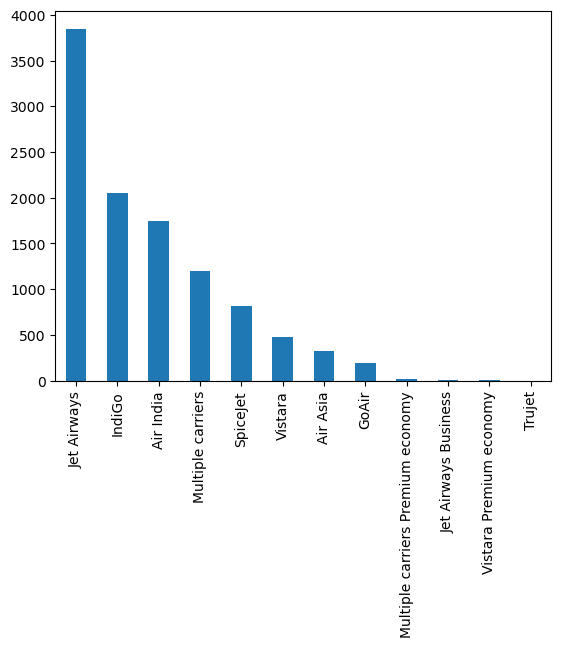

In [58]:
df.Airline.value_counts().plot(kind='bar')

In [59]:
df.Airline.value_counts(normalize=True)

Jet Airways                          0.360326
IndiGo                               0.192192
Air India                            0.163921
Multiple carriers                    0.111964
SpiceJet                             0.076577
Vistara                              0.044842
Air Asia                             0.029863
GoAir                                0.018161
Multiple carriers Premium economy    0.001217
Jet Airways Business                 0.000562
Vistara Premium economy              0.000281
Trujet                               0.000094
Name: Airline, dtype: float64

In [60]:
df.groupby('Airline')['Price'].size().sort_values(ascending=False)

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Price, dtype: int64

In [61]:
df.groupby('Airline')['Price'].sum().sort_values(ascending=False)

Airline
Jet Airways                          44817461
Air India                            16831361
Multiple carriers                    13039603
IndiGo                               11648071
Vistara                               3734451
SpiceJet                              3548717
Air Asia                              1783293
GoAir                                 1137045
Jet Airways Business                   350152
Multiple carriers Premium economy      148445
Vistara Premium economy                 26887
Trujet                                   4140
Name: Price, dtype: int64

In [62]:
freq=df.groupby('Airline')['Price'].size().values
price=df.groupby('Airline')['Price'].sum().values

In [63]:
airline_avg_price=price/freq

In [64]:
#for i in np.nditer(airline_avg_price):
    #print(i)

In [65]:
df['Date_of_Journey']=pd.to_datetime(df.Date_of_Journey)

In [66]:
df.insert(2,'day',df.Date_of_Journey.dt.day)

In [67]:
df.Date_of_Journey.dt.year.unique()

array([2019])

In [68]:
df.Date_of_Journey.dt.weekday


0        6
1        5
2        4
3        3
4        3
        ..
10678    2
10679    5
10680    5
10681    3
10682    3
Name: Date_of_Journey, Length: 10682, dtype: int64

In [69]:
df.insert(3,'month',df.Date_of_Journey.dt.month)
df.insert(4,'weeek_day',df.Date_of_Journey.dt.weekday)

In [70]:
df.drop('Date_of_Journey',axis=1,inplace=True)

### Date of Journey column has been splitted into three new columns and has been dropped.
*     day of the month column
*     month column
*     week_day-number is given to each day i.e monday is 0 and sunday is 6
*     The dataset only include the data from year 2019 so no need to make a year column

<AxesSubplot:>

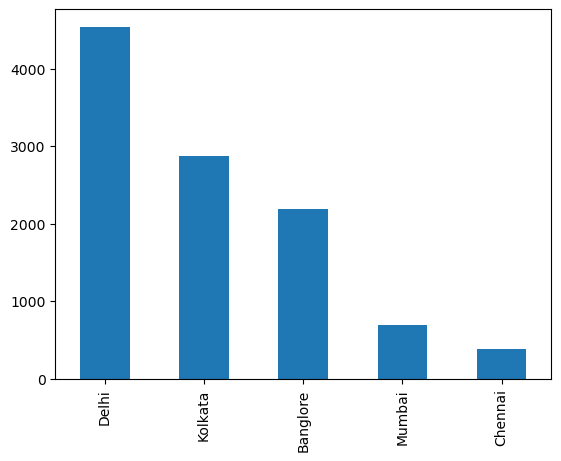

In [71]:
df.Source.value_counts().plot(kind='bar')

<AxesSubplot:>

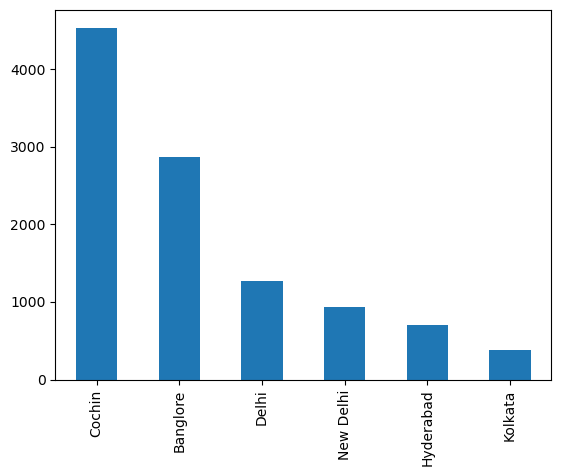

In [72]:
df.Destination.value_counts().plot(kind='bar')

In [73]:
df.insert(8,'dep_hour',pd.to_datetime(df.Dep_Time).dt.hour)
df.insert(9,'dep_min',pd.to_datetime(df.Dep_Time).dt.minute)

In [74]:
df.drop('Dep_Time',axis=1,inplace=True)

### Dep_time column is divided into two columns and it has been dropped from the df
*   dep_hour which contains the hour value of Dep_time
*   dep_min which contains the minute value of Dep_time

<AxesSubplot:>

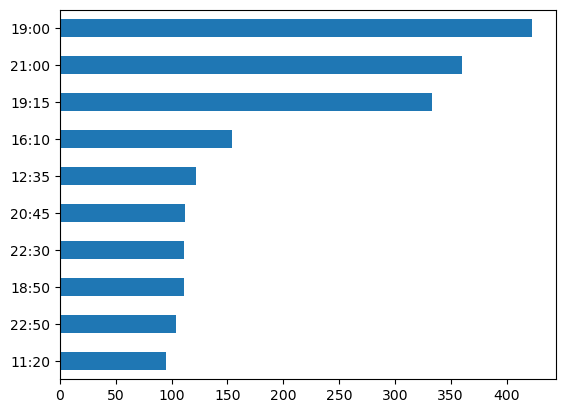

In [75]:
df.Arrival_Time.value_counts().head(10).sort_values().plot(kind='barh')

In [77]:
ah=df.Arrival_Time.apply(lambda x:x.split(' ')[0].split(':')[0])
am=df.Arrival_Time.apply(lambda x:x.split(' ')[0].split(":")[1])

In [78]:
df.insert(9,'arr_hour',ah)
df.insert(10,'arr_minute',am)

In [79]:
df.drop('Arrival_Time',axis=1,inplace=True)

### Similar to Depature time column ,Arrival time column has been substituted by hour and minute column
### and the original column has been dropped.

* **There was a error in data entering that showed a flight duration as 5 minute whereas the correct duration was 12 hours **

In [91]:
df.iloc[6474]

Airline                        Air India
day                                    3
month                                  6
weeek_day                              0
Source                            Mumbai
Destination                    Hyderabad
Route              BOM → GOI → PNQ → HYD
dep_hour                              16
dep_min                               50
arr_hour                              16
arr_minute                            55
Duration                              5m
Total_Stops                      2 stops
Additional_Info                  No info
Price                              17327
Name: 6474, dtype: object

In [92]:
df['duration_minutes']=pd.to_timedelta(df.Duration)/pd.Timedelta(minutes=1)

In [93]:
df.duration_minutes=df.duration_minutes.astype('int')

In [94]:
df.drop(['Duration'],axis=1,inplace=True)

In [ ]:
xf['duration_minutes']=pd.to_timedelta(xf.Duration)/pd.Timedelta(minutes=1)
xf.duration_minutes=xf.duration_minutes.astype('int')
xf.drop(['Duration'],axis=1,inplace=True)



###  We have  converted the Duration column in minutes 
* Convert the duration column into timedelta format
* Extract the minutes by dividing it by pd.Timedelta(minutes=1)
* The Duration column has been dropped

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10682 non-null  object
 1   day               10682 non-null  int64 
 2   month             10682 non-null  int64 
 3   weeek_day         10682 non-null  int64 
 4   Source            10682 non-null  object
 5   Destination       10682 non-null  object
 6   Route             10682 non-null  object
 7   dep_hour          10682 non-null  int64 
 8   dep_min           10682 non-null  int64 
 9   arr_hour          10682 non-null  object
 10  arr_minute        10682 non-null  object
 11  Total_Stops       10682 non-null  object
 12  Additional_Info   10682 non-null  object
 13  Price             10682 non-null  int64 
 14  duration_minutes  10682 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 1.3+ MB


In [96]:
df[['arr_hour','arr_minute']]=df[['arr_hour','arr_minute']].astype(int)

In [97]:
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [98]:
df.Total_Stops=df.Total_Stops.map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},na_action='ignore')

#### The Total_Stops columns values is mapped with its respective numbers and non stop is replaced with 0.

In [99]:
df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [100]:
ff=df.drop(['Route','Additional_Info'],axis=1)

### For better performance of the model the Route column and Additional_info have been dropped the resulting data frame has been stored in dataframe ff.

In [101]:
ff.head()

,Airline,day,month,weeek_day,Source,Destination,dep_hour,dep_min,arr_hour,arr_minute,Total_Stops,Price,duration_minutes
0,IndiGo,24,3,6,Banglore,New Delhi,22,20,1,10,0,3897,170
1,Air India,5,1,5,Kolkata,Banglore,5,50,13,15,2,7662,445
2,Jet Airways,6,9,4,Delhi,Cochin,9,25,4,25,2,13882,1140
3,IndiGo,5,12,3,Kolkata,Banglore,18,5,23,30,1,6218,325
4,IndiGo,3,1,3,Banglore,New Delhi,16,50,21,35,1,13302,285


In [102]:
price_day_wise=ff.groupby('weeek_day')['Price'].sum().sort_values(ascending=False).values

In [103]:
day_list='thur','fri','mon','wed','tue','sat','sun'

<AxesSubplot:>

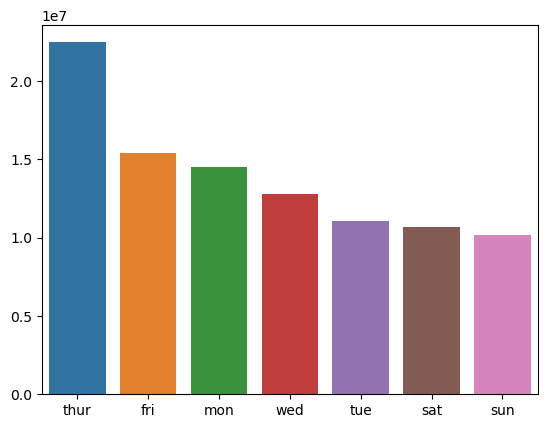

In [104]:
sns.barplot(x=list(day_list),y=price_day_wise)

In [105]:
fdf=ff.copy()

### We will use OneHotEncoding for categorical features present in Source,Destination and Airline.Which will make the total features equals to 30

In [106]:
from sklearn.preprocessing import OneHotEncoder as ohe

In [107]:
from sklearn.compose import ColumnTransformer as ct

In [108]:
X=ff.drop('Price',axis=1)

In [109]:
y=ff.Price

In [ ]:
X.Airline.unique()

In [ ]:
X.Airline.unique()

In [110]:
trans_ohe=ct(transformers=[
    ('ohe_tf',ohe(sparse=False,drop='first'),['Airline','Source','Destination'])
],remainder='passthrough')

In [142]:
X_encoded=trans_ohe.fit_transform(X)

In [113]:
trans_ohe.get_feature_names_out() 

array(['ohe_tf__Airline_Air India', 'ohe_tf__Airline_GoAir',
       'ohe_tf__Airline_IndiGo', 'ohe_tf__Airline_Jet Airways',
       'ohe_tf__Airline_Jet Airways Business',
       'ohe_tf__Airline_Multiple carriers',
       'ohe_tf__Airline_Multiple carriers Premium economy',
       'ohe_tf__Airline_SpiceJet', 'ohe_tf__Airline_Trujet',
       'ohe_tf__Airline_Vistara',
       'ohe_tf__Airline_Vistara Premium economy',
       'ohe_tf__Source_Chennai', 'ohe_tf__Source_Delhi',
       'ohe_tf__Source_Kolkata', 'ohe_tf__Source_Mumbai',
       'ohe_tf__Destination_Cochin', 'ohe_tf__Destination_Delhi',
       'ohe_tf__Destination_Hyderabad', 'ohe_tf__Destination_Kolkata',
       'ohe_tf__Destination_New Delhi', 'remainder__day',
       'remainder__month', 'remainder__weeek_day', 'remainder__dep_hour',
       'remainder__dep_min', 'remainder__arr_hour',
       'remainder__arr_minute', 'remainder__Total_Stops',
       'remainder__duration_minutes'], dtype=object)

In [121]:
xf=pd.read_excel('/kaggle/input/flight-price-prediction-dataset/Test_set.xlsx')

* Date of Journey

In [123]:
xf['Date_of_Journey']=pd.to_datetime(xf.Date_of_Journey)
xf.insert(2,'day',xf.Date_of_Journey.dt.day)
xf.insert(3,'month',xf.Date_of_Journey.dt.month)
xf.insert(4,'weeek_day',xf.Date_of_Journey.dt.weekday)
xf.drop('Date_of_Journey',axis=1,inplace=True)

* Depature column

In [126]:
xf.insert(8,'dep_hour',pd.to_datetime(xf.Dep_Time).dt.hour)
xf.insert(9,'dep_min',pd.to_datetime(xf.Dep_Time).dt.minute)
xf.drop('Dep_Time',axis=1,inplace=True)


* Arrival column

In [127]:
xh=xf.Arrival_Time.apply(lambda x:x.split(' ')[0].split(':')[0])
xm=xf.Arrival_Time.apply(lambda x:x.split(' ')[0].split(":")[1])
xf.insert(9,'arr_hour',xh)
xf.insert(10,'arr_minute',xm)
xf.drop('Arrival_Time',axis=1,inplace=True)

* Duration

In [129]:
xf['duration_minutes']=pd.to_timedelta(xf.Duration)/pd.Timedelta(minutes=1)
xf.duration_minutes=xf.duration_minutes.astype('int')
xf.drop(['Duration'],axis=1,inplace=True)

In [130]:
xf[['arr_hour','arr_minute']]=xf[['arr_hour','arr_minute']].astype(int)

In [139]:
xf.Total_Stops=xf.Total_Stops.map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},na_action='ignore')

In [140]:
xff=xf.drop(['Route','Additional_Info'],axis=1)

In [144]:
x_test=trans_ohe.fit_transform(xff)

### Predicting the price using Regressor models

In [147]:
import xgboost as xgb

In [148]:
xgbr=xgb.XGBRegressor()

In [160]:
from sklearn.model_selection import train_test_split as tts,cross_val_score as cvs

In [150]:
X_train,X_test,y_train,y_test=tts(X_encoded,y)

In [153]:
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [163]:
y_test_pred=xgbr.predict(X_test)

In [159]:
xgbr.score(X_test,y_test)

0.8338237598612954

In [161]:
scores=cvs(xgbr,X_encoded,y,cv=5)
scores

array([0.83896197, 0.8323705 , 0.86121078, 0.83307998, 0.8118667 ])

## The train data has 12 Airlines whereas the test data has 11 unique Airline which is creating data mismatch

In [194]:
x_test.shape

(2671, 28)

In [201]:
b=np.zeros((2671,1),dtype=np.int8)
b

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int8)

In [205]:
t=np.hstack((x_test,b))
t.shape

(2671, 29)

In [207]:
final_pred=xgbr.predict(t)